# Adaptive frequency-selection

## Select frequency-range for Fourier transform in CSEM modelling

Controlled-source electromagnetic responses in three dimenision are usually modelled directly in the domain where you want to process the data, hence a time-domain code for time-domain processing, and a frequency-domain for frequency-domain processing. However, under certain conditions it can be favourable to calculate the model in the
other domain and transform it with a (inverse) Fourier transform. The Fourier transform is generally very fast, in comparison with the 3D calculation of the electromagnetic response.

[Mulder et al., 2008](#References), presented an adaptive frequency selection scheme which showed that if you carefully select the frequencies you only need a a few dozens, and the total runtime can therefore become competitive to time-domain codes. Their scheme can be improved with a few simple steps, and we were able to achieve the same result with 2/3 of their frequencies. However, this adaptive system of Mulder or our improved version has a serious drawback, as the frequency range is very offset dependent. If you move to larger (or smaller) offsets the adaptive scheme will selecte lower (or higher) frequencies. We developed therefore a system to select frequencies with a regular spacing (on a log10-scale), but within a certain range. Using digital linear filters (DLF) and a fast, layered modeller (empymod) to check, we developed an interactive tool to select the best frequency range which covers a wide range of offsets. With just four frequencies per decade over the range of 0.001 Hz to 10 Hz you need only 16 frequencies to cover an offset range from 1 to 10 km with an error-level in the time domain below 1%.

See the notebook InteractiveFrequencySelection.ipynb for the interactive GUI.


## Comparison with scheme from Mulder et al., 2008, Geophysics.

**Mulder et al, 2008, Geophysics:**
- Adaptive scheme using PCHIP interpolation and absolute value of the frequency response.
- When a point does not fit the error-criteria, two points are added, one to the left and one to the right.
- The error check is done for all existing frequencies at once.

**This scheme can be improved for two reasons:**
- Only add one point at a time, and check again, because the error of many will improve with just one point added.
- Use the imaginary part, where we know it starts and ends at zero amplitude. Also, add zero amplitude points at f=1e-100 and 1e100 Hz, which improves the interpolation.

**The implemented scheme goes as follows:**
- Check the error of all existing points. Always adjust the lowest frequency which doesn't fit the criteria.
- If the lowest frequency is wrong, add a new point half a decade to the left.
- After that, move to the right, always adding one point halfway between the lowest failing frequency and the following one.
- If the highest frequency is the last remaining, and it fails, add a point half a decade to the right.

**With this scheme, we achiev a result as good or better as Mulder's with only 15 instead of 24 frequencies.**

#### References

> Mulder, W. A., M. Wirianto, and E. Slob, 2008, Time-domain modeling of electromagnetic diffusion with a frequency-domain code: Geophysics, 73, F1-F8; DOI: [10.1190/1.2799093](https://doi.org/10.1190/1.2799093).

In [1]:
import empymod
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

import freqselect  # Script in this directory

In [2]:
# Style adjustments
%matplotlib notebook
plt.style.use('ggplot')

Uncomment and run the following to have the notebook in full width.

In [3]:
#%%html
#<style>
#.output_wrapper .ui-dialog-titlebar {display: none;}
#.container { width:100% !important; }
#</style>

   time        [s] :  0.01 - 100 : 101  [min-max; #]
   Fourier         :  DLF (Sine-Filter)
     > Filter      :  Key 201 CosSin (2012)
     > DLF type    :  Lagged Convolution
   frequency  [Hz] :  1.4626E-09 - 1.9191E+07 : 268  [min-max; #]


<IPython.core.display.Javascript object>


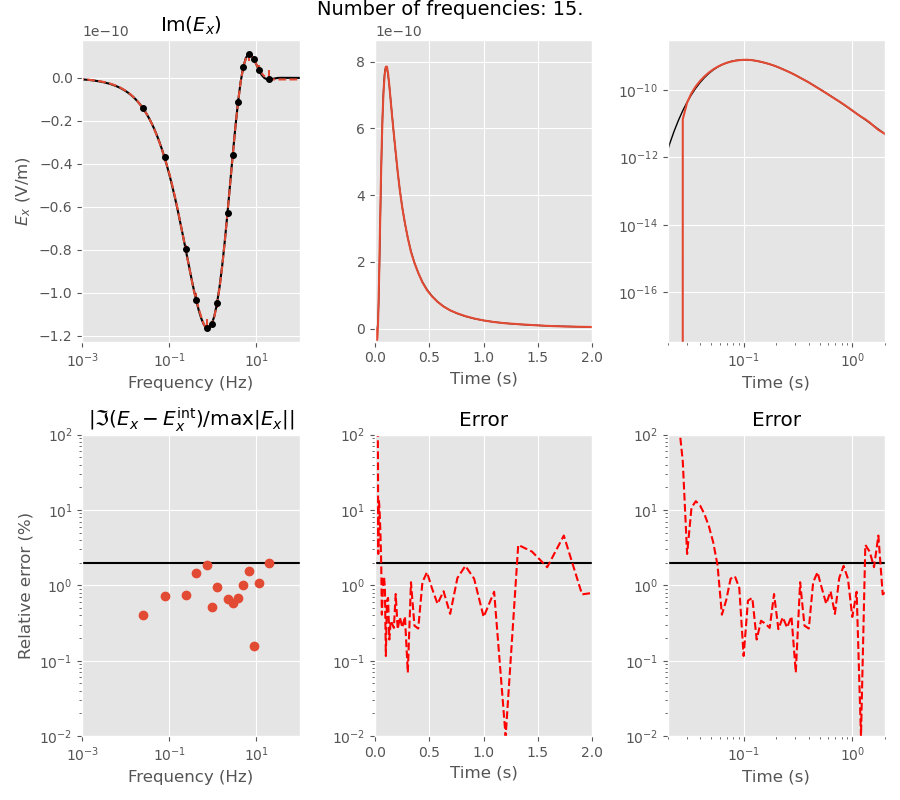

In [4]:
tEM, freq, fEMp = freqselect.design_freq_range(
    time=np.logspace(-2, 2, 101),
    model={'src': [0, 0, 0], 'rec': [900, 0, 0], 'depth': [], 'res': 1, 'verb': 1},
    rtol=0.02, signal=0, freq_range=3, xlim_freq=[1e-3, 1e2], xlim_lin=[0, 2], xlim_log=[2e-2, 2],
    pause=0.001)

## Multi-offset

The scheme of Mulder has one problem: This interactive frequency determination is very offset dependent, as the frequency range changes a lot with offset. Shorter offset require higher frequencies, longer offsets require lower frequencies.

   time        [s] :  0.1 - 1000 : 101  [min-max; #]
   Fourier         :  DLF (Sine-Filter)
     > Filter      :  Key 201 CosSin (2012)
     > DLF type    :  Lagged Convolution
   frequency  [Hz] :  1.4626E-10 - 1.9191E+06 : 268  [min-max; #]


<IPython.core.display.Javascript object>


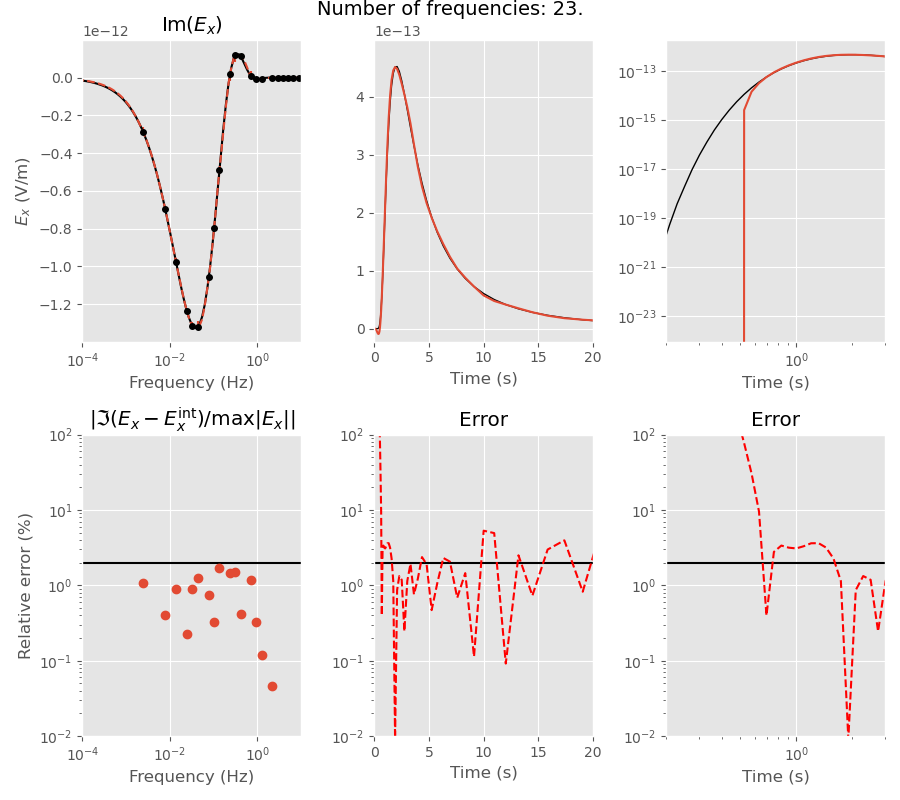

In [5]:
tEM2, freq2, fEMp2 = freqselect.design_freq_range(
    time=np.logspace(-1, 3, 101),
    model={'src': [0, 0, 0], 'rec': [4000, 0, 0], 'depth': [], 'res': 1, 'verb': 1},
    rtol=0.02, signal=0, freq_range=freq, xlim_freq=[1e-4, 1e1], xlim_lin=[0, 20], xlim_log=[2e-1, 3],
    pause=0.001)

In [6]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Tue Jun 16 19:11:11 2020 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.7.7 (default, Mar 26 2020, 15:48:22)  [GCC 7.3.0]

             numpy : 1.18.1
             scipy : 1.4.1
             numba : 0.49.1
           empymod : 2.0.0
           IPython : 7.13.0
        matplotlib : 3.2.1

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------